In [2]:
import networkx as nx
from utils import *
import pandas as pd
import numpy as np
import os


##数据概览

In [2]:
graph_path='./graph/'
graphs=os.listdir(graph_path)
graphs.remove('partition_graph')
graphs.sort()
print(graphs)

["['01', '03']_2016.gexf", "['01', '03']_2017.gexf", "['01', '03']_2018.gexf", "['01', '03']_2019.gexf", "['01', '03']_2020.gexf", "['01', '03']_total.gexf"]


In [3]:
path=graph_path+graphs[2]
print(path)
graph=nx.read_gexf(path)
type(graph)

./graph/['01', '03']_2018.gexf


networkx.classes.digraph.DiGraph

In [4]:
graph.nodes['156']

{'name': 'China',
 'iso3A': 'CHN',
 'latitude': 35.86166,
 'longitude': 104.195397,
 'totalExportValue': 2680456171669.0,
 'selectedExportValue': 1871182156.0,
 'totalImportValue': 807335965923.0,
 'selectedImportValue': 45882762.0,
 'label': '156'}

In [5]:
graph.edges['156','840']

{'totalValue': 677350868554.0, 'selectedValue': 1984948757.0, 'id': '2961'}

In [9]:
betweenness=nx.centrality.betweenness_centrality(graph)
betweenness

{'148': 0.0001546927472207617,
 '504': 0.0010680479239856993,
 '528': 0.0,
 '566': 0.0009228456471945318,
 '616': 0.0,
 '646': 0.0005894361855040741,
 '682': 0.0012482991611893436,
 '686': 0.0006443683264983834,
 '710': 0.0014180754235360487,
 '724': 0.0,
 '752': 0.0,
 '764': 0.0014946605331721545,
 '784': 0.0012808415155450784,
 '792': 0.0,
 '826': 0.0,
 '840': 0.0014946605331721545,
 '048': 0.0008105910279840421,
 '056': 0.0,
 '124': 0.0014946605331721545,
 '156': 0.0014946605331721545,
 '180': 0.0,
 '250': 0.0,
 '276': 0.0,
 '300': 0.0,
 '344': 0.0013516175780238918,
 '356': 0.0013984304278769697,
 '360': 0.001352079298516724,
 '380': 0.0,
 '392': 0.0014495278423241212,
 '404': 0.0,
 '410': 0.001369411897841707,
 '512': 0.0,
 '531': 0.0,
 '562': 0.000383149968147957,
 '586': 0.0012706514159688273,
 '702': 0.0014495278423241212,
 '756': 0.00137156862329483,
 '800': 0.0006312888305714585,
 '818': 0.0011013916670018426,
 '834': 0.0006662159090514732,
 '070': 0.0,
 '144': 0.001091420297

In [12]:

def bet_analisis(graph):
    frames=[]
    #聚类系数
    clustering=[]
    for key,value in nx.centrality.betweenness_centrality(graph).items():
        clustering.append((key,value))
    clustering.sort(key=lambda x:(x[1]),reverse=True)

    top10=pd.DataFrame(clustering,columns=['name','cluster_coe'])[0:10]
    for i in range(0,len(top10)):
        code=top10.loc[i,'name']
        _,name,_,_=country_code_to_info(code)
        top10.loc[i,'name']=name
    frames.append(top10)

    return pd.concat(frames,axis=1)

In [11]:
bet_analisis(graph)

,name,cluster_coe
0,Thailand,0.001495
1,United States of America,0.001495
2,Canada,0.001495
3,China,0.001495
4,Chinese Taipei,0.001495
5,New Zealand,0.001472
6,Japan,0.001450
7,Singapore,0.001450
8,Australia,0.001443
9,South Africa,0.001418


###基本统计

In [11]:
data=[]
for g in graphs:
    path=graph_path+g
    graph=nx.read_gexf(path)

    #网络密度
    density=nx.density(graph)
    #print("density=",density)


    #聚类系数
    clustering=nx.algorithms.average_clustering(graph)
    #print(f'clustering= {clustering}')

    #平均度
    avg_out_degree=sum([graph.out_degree(i) for i in graph])/graph.number_of_nodes()
    #print(f'avg_in_degree= {avg_out_degree}')

    avg_in_degree=sum([graph.in_degree(i) for i in graph])/graph.number_of_nodes()
    #print(f'avg_in_degree= {avg_in_degree}')
    
    #平均路径
    undirected=graph.to_undirected()
    avg_path_len=nx.average_shortest_path_length(undirected)

    #平均贸易额
    avg_totalExportValue=avg_node_weight(graph,'totalExportValue')

    record={
    'name':g,
    'density':density,'clustering':clustering,
    'avg_out_d':avg_out_degree,'avg_in_d':avg_in_degree,
    'avg_path_len':avg_path_len,
    'avg_totalTradeValue':avg_totalExportValue
    }
    data.append(record)
df=getDF(data)
df.to_csv('./analisis/yearly_avg.csv')
df

,name,density,clustering,avg_out_d,avg_in_d,avg_path_len,avg_totalTradeValue
0,"['01', '03']_2016.gexf",0.361423,0.728259,67.224599,67.224599,1.426542,3.610529e+10
1,"['01', '03']_2017.gexf",0.319447,0.746114,59.417112,59.417112,1.478926,4.404946e+10
2,"['01', '03']_2018.gexf",0.285780,0.759374,53.155080,53.155080,1.523202,6.136963e+10
3,"['01', '03']_2019.gexf",0.239118,0.745122,44.475936,44.475936,1.588293,3.052175e+10
4,"['01', '03']_2020.gexf",0.038041,0.870934,7.037634,7.037634,1.926184,5.141182e+09
5,"['01', '03']_total.gexf",0.442959,0.760349,82.390374,82.390374,1.325456,4.004939e+10


In [16]:
data=[]
for g in graphs:
    path=graph_path+g
    graph=nx.read_gexf(path)

    #平均路径
    undirected=graph.to_undirected()
    avg_path_len=nx.average_shortest_path_length(undirected)
    avg_path_in_len=nx.average_shortest_path_length(undirected,weight='totalImportValue')
    avg_path_out_len=nx.average_shortest_path_length(undirected,weight='totalExportValue')
    record={
    'avg_path_len':avg_path_len,
    'avg_path_in_len':avg_path_in_len,
    'avg_path_out_len':avg_path_out_len,
    }
    data.append(record)
df=getDF(data)
df

,avg_path_len,avg_path_in_len,avg_path_out_len
0,1.426542,1.426542,1.426542
1,1.478926,1.478926,1.478926
2,1.523202,1.523202,1.523202
3,1.588293,1.588293,1.588293
4,1.926184,1.926184,1.926184
5,1.325456,1.325456,1.325456


In [27]:
df.to_csv('./yearly_avg.csv')

##社团分析

In [6]:
from networkx.algorithms.community import greedy_modularity_communities
from utils import add_partition_tag
#partitions
year_partitions={}
for g in graphs:
    path=graph_path+g
    graph=nx.read_gexf(path)
    tag=g[:-5][13:]#2019 或 total
    weights=['totalValue','selectedValue']
    for weight in weights:
        partition=greedy_modularity_communities(graph,weight=weight)
        add_partition_tag(graph,partition,f'{weight}_best')
        year_partitions[f'{tag}_{weight}_best']=partition

        n_communities=10
        partition=greedy_modularity_communities(graph,weight=weight,n_communities=n_communities)
        add_partition_tag(graph,partition,f'{weight}_{n_communities}')
        year_partitions[f'{tag}_{weight}_{n_communities}']=partition
    nx.write_gexf(graph,f'{graph_path}partition_graph/{g}')

In [8]:
list(year_partitions['2016_totalValue_best'][0])[0:5]

['250', '196', '148', '690', '064']

##单年top分析

In [29]:
#top统计
for g in graphs:
    path=graph_path+g
    graph=nx.read_gexf(path)
    tag=g[:-5][13:]#2019 或 total
    
    df=top10_analisis(graph)
    df.to_csv(f'./analisis/top/{tag}_top10.csv')


In [13]:
#top统计
for g in graphs:
    path=graph_path+g
    graph=nx.read_gexf(path)
    tag=g[:-5][13:]#2019 或 total
    
    df=bet_analisis(graph)
    df.to_csv(f'./analisis/{tag}_bet.csv')


In [ ]:
graph.edges['192','222']

{'totalValue': 539119.0, 'selectedValue': 273.0, 'id': '0'}

In [ ]:
graph.edges['222','192']

{'totalValue': 33810218.0, 'selectedValue': 13737.0, 'id': '2560'}

#度分布

In [5]:
graph.degrees

AttributeError: 'DiGraph' object has no attribute 'degrees'

In [14]:
for g in graphs:
    degree_distribution_dict={}
    path=graph_path+g
    graph=nx.read_gexf(path)
    for i in graph:
        i_degree=graph.in_degree(i)
        if(degree_distribution_dict.get(i_degree)):
            degree_distribution_dict[i_degree]+=1
        else:
            degree_distribution_dict[i_degree]=1
            
    tag=g[:-5][13:]#2019 或 total
    df=pd.DataFrame.from_dict(degree_distribution_dict, orient='index')
    df.to_csv(f'./analisis/deg/{tag}_in_deg.csv',header=False)

In [15]:
for g in graphs:
    degree_distribution_dict={}
    path=graph_path+g
    graph=nx.read_gexf(path)
    for i in graph:
        i_degree=graph.out_degree(i)
        if(degree_distribution_dict.get(i_degree)):
            degree_distribution_dict[i_degree]+=1
        else:
            degree_distribution_dict[i_degree]=1
            
    tag=g[:-5][13:]#2019 或 total
    df=pd.DataFrame.from_dict(degree_distribution_dict, orient='index')
    df.to_csv(f'./analisis/deg/{tag}_out_deg.csv',header=False)

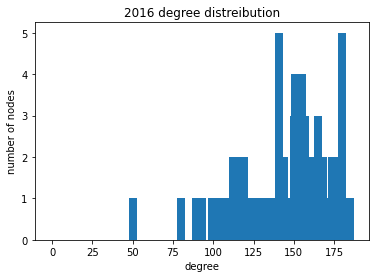

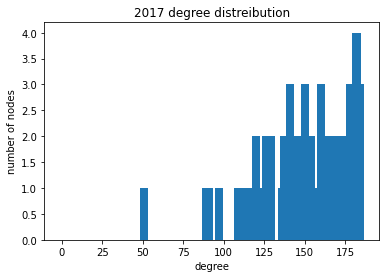

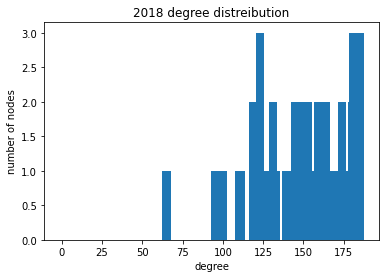

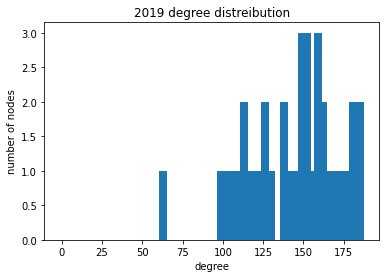

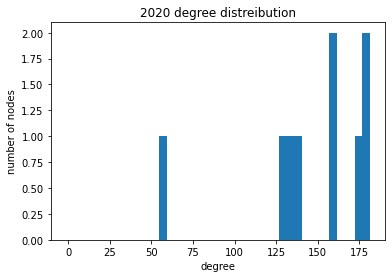

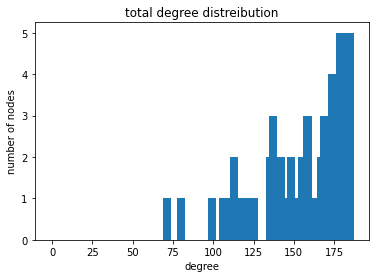

In [4]:
for g in graphs:
    path=graph_path+g
    graph=nx.read_gexf(path)
    degree_distribution(graph,g[:-5][13:],degree='in')


['01', '03']_2016.gexf
-0.19235614437762338


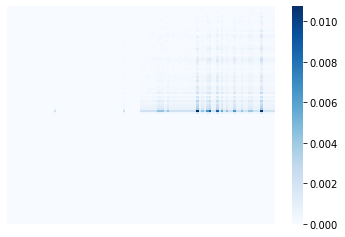

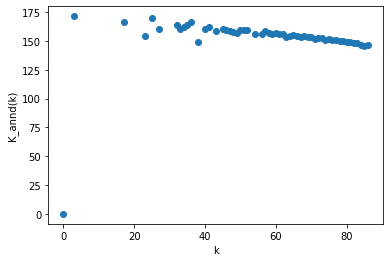

['01', '03']_2017.gexf
-0.1931999986903851


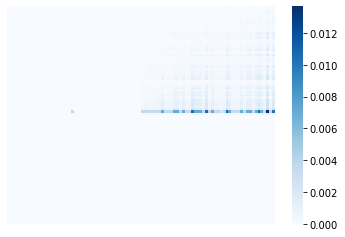

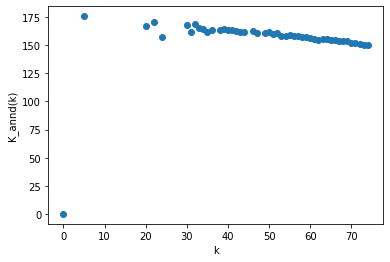

['01', '03']_2018.gexf
-0.19416083886544033


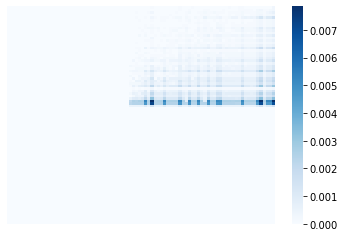

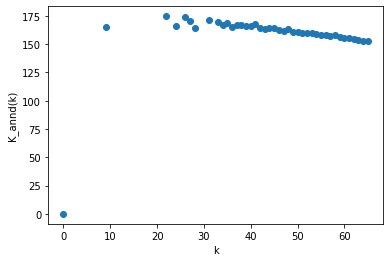

['01', '03']_2019.gexf
-0.1908549822901968


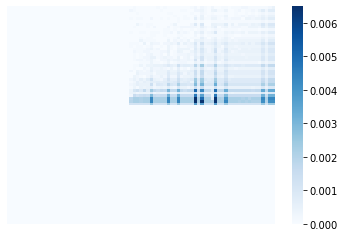

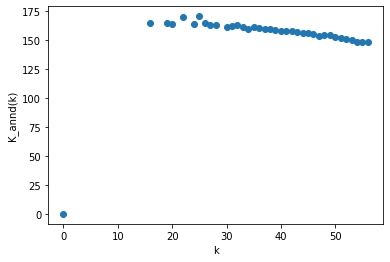

['01', '03']_2020.gexf
-0.22779175851021854


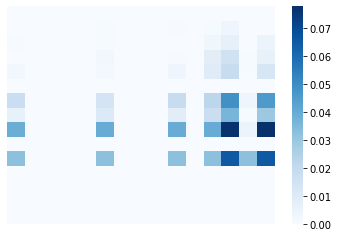

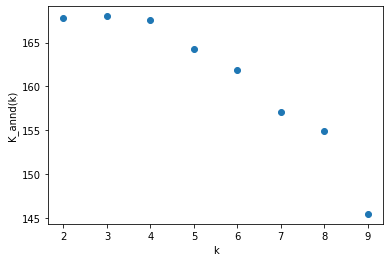

['01', '03']_total.gexf
-0.15229998865884012


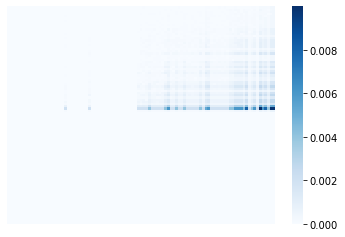

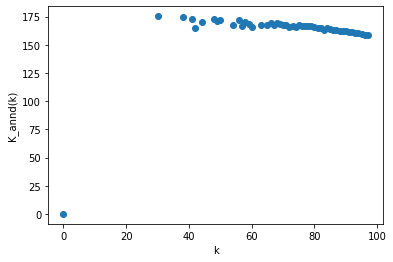

In [17]:
from lib.degrees_correlation import degrees_correlation_analise
for g in graphs:
    path=graph_path+g
    graph=nx.read_gexf(path)
    print(g)
    degrees_correlation_analise(graph,'out','in')

-0.15229998865884012


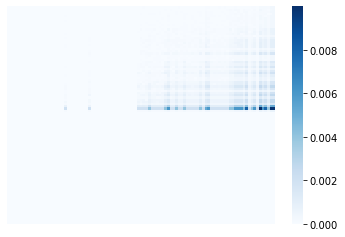

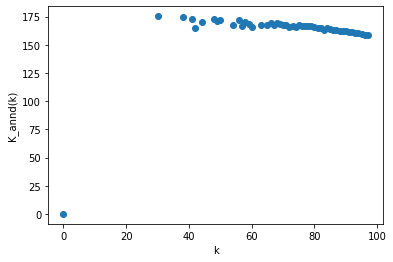

In [9]:
degrees_correlation_analise(graph,'out','in')

In [62]:
##我们选取出口额前5的商品品类，占总出口额比重这一指标对数据进行分析。
data_names=['data_2016.csv','data_2017.csv','data_2018.csv','data_2019.csv','data_2020.csv']
def initial_Product_Value_dict():
    d=dict()
    d['iso3A']=''
    d['name']=''
    for code in pd.read_csv('./data/ProductOrSectorCode_detail.csv',dtype=str)['code']:
        d[code]=0
    return d

product_codes=pd.read_csv('./data/ProductOrSectorCode_detail.csv',dtype=str)['code'].to_list()
for data_name in data_names:
        data=pd.read_csv(f'./data/{data_name}',dtype=str)
        data.drop(['IndicatorCategoryCode','IndicatorCode','ProductOrSectorClassificationCode','PeriodCode','FrequencyCode','UnitCode','ValueFlagCode'],inplace=True,axis=1)
        data_dict={}
        for i in range(0,len(data)):
                exporter=data['PartnerEconomyCode'][i]
                ex_iso3A,ex_name,_,_=country_code_to_info(exporter)
                if data_dict.get(exporter)==None:
                        data_dict[exporter]=initial_Product_Value_dict()
                        data_dict[exporter]['iso3A']=ex_iso3A
                        data_dict[exporter]['name']=ex_name
                ProductCode=data['ProductOrSectorCode'][i]
                value=float(data['Value'][i])
                #print(exporter,ProductCode,value)
                data_dict[exporter][ProductCode]+=value
        #各国对应商品出口额
        df=pd.DataFrame.from_dict(data_dict, orient='index')
        percentages=[]
        for i in range(0,len(df)):
                record=df.iloc[i]
                values=[]
                for code in product_codes:
                        values.append(record[code])
                #values从大到小排序
                values.sort(reverse=True)
                #前五商品占总出口额百分比
                top_5_percentage=sum(values[0:4])/sum(values)
                percentages.append(top_5_percentage)
        #返回平均数
        avg_percentages=sum(percentages)/len(percentages)
        tag=data_name[5:-4]
        print(tag,avg_percentages)

2016 0.8242728910513474
2017 0.8334658441707964
2018 0.8592468939241489
2019 0.80539411082097
2020 0.877203436852371
